In [ ]:
from PIL import Image
import os

# Specify the directory of the image dataset
image_directory = 'C:/Users/Administrator/Desktop/thesis/thesis dataset'

# Initialize a list to store images
images = []

# Traverse all files in the specified directory
for filename in os.listdir(image_directory):
    if filename.endswith(".jpg") or filename.endswith(".png"): # You can add more image formats as needed
        file_path = os.path.join(image_directory, filename)
        image = Image.open(file_path)
        images.append(image)

# Now, the "images" list contains all image objects

### Delete duplicate photos

In [ ]:
# Create a new list to store valid images
valid_images = []

# Traverse the original list of images
for image in images:
    try:
        # Try to get the image mode to check its validity
        image_mode = image.mode
        valid_images.append(image)
    except:
        print("An image was invalid and has been skipped.")

# Now, the "valid_images" list contains all valid image objects
images = valid_images

In [5]:
from hashlib import sha1

# Create a set to store the hash values of the images
image_hashes = set()

# Create a new list to store unique images
unique_images = []

# Traverse the list of valid images
for image in valid_images:
    # Convert image to grayscale for consistent hashing
    gray_image = image.convert('L')

    # Compute the hash value of the image
    image_hash = sha1(gray_image.tobytes()).hexdigest()

    # Check if this hash value has been seen before
    if image_hash not in image_hashes:
        # If not, add the hash value to the set and the image to the unique images list
        image_hashes.add(image_hash)
        unique_images.append(image)
    else:
        print("A duplicate image has been found and skipped.")

# Now, the "unique_images" list contains all unique and valid image objects
images = unique_images

A duplicate image has been found and skipped.
A duplicate image has been found and skipped.
A duplicate image has been found and skipped.
A duplicate image has been found and skipped.
A duplicate image has been found and skipped.


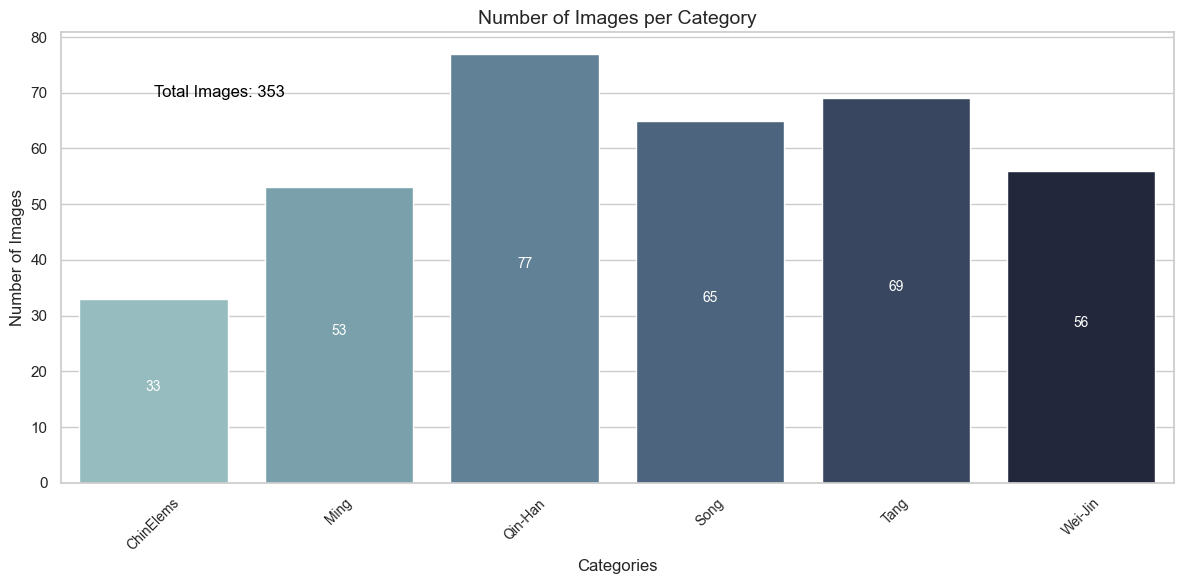

In [35]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the directory of the image dataset
image_directory = 'C:/Users/Administrator/Desktop/thesis/thesis dataset'

# Initialize a list to store images
images = []

# Traverse all files in the specified directory
for filename in os.listdir(image_directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        file_path = os.path.join(image_directory, filename)
        image = Image.open(file_path)
        images.append(image)

# Initialize a dictionary to store categories count
categories_count = {}

# Traverse the image directory, calculate the number of images for each category
for filename in os.listdir(image_directory):
    category = filename.split(' ')[0]
    if category in categories_count:
        categories_count[category] += 1
    else:
        categories_count[category] = 1

# Extract the categories and counts
categories = list(categories_count.keys())
counts = list(categories_count.values())

# Create the color palette
pal = sns.cubehelix_palette(len(categories), rot=-.25, light=.7)

plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=categories, y=counts, palette=pal)

plt.xlabel('Categories', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Number of Images per Category', fontsize=14)
plt.xticks(rotation=45, fontsize=10)

# Add count labels on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count/2, str(count), ha='center', color='white', fontsize=10)
image_path = os.path.join(desktop_path, "0.png")
plt.savefig(image_path, dpi=300, bbox_inches='tight')
# Add the total number of images
total_images = sum(counts)
plt.text(0, max(counts) * 0.9, f'Total Images: {total_images}', fontsize=12, color='black')

plt.tight_layout()
plt.show()



# GLCM

This part tests the GLCM-related values associated with the image dataset and removes the poorly performing images.

In [21]:
import os
import cv2
from skimage.feature import local_binary_pattern
from skimage.feature import graycomatrix, graycoprops
import numpy as np

# 函数来计算LBP特征
def get_lbp(image, P=8, R=1):
    lbp = local_binary_pattern(image, P, R, method='uniform')
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, P + 3), range=(0, P + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    return hist

# 函数来计算GLCM特征
def get_glcm(image, distances=[5], angles=[0], levels=256, symmetric=True, normed=True):
    glcm = graycomatrix(image, distances=distances, angles=angles, levels=levels, symmetric=symmetric, normed=normed)
    contrast = graycoprops(glcm, 'contrast')
    dissimilarity = graycoprops(glcm, 'dissimilarity')
    homogeneity = graycoprops(glcm, 'homogeneity')
    energy = graycoprops(glcm, 'energy')
    correlation = graycoprops(glcm, 'correlation')
    return contrast, dissimilarity, homogeneity, energy, correlation

# 读取图像数据集
dataset_path = "C:\\Users\\Administrator\\Desktop\\hanfu2 p"
image_paths = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path) if os.path.isfile(os.path.join(dataset_path, f))]

for image_path in image_paths:
    image = cv2.imread(image_path, 0)  # 以灰度模式读取图片
    if image is None:
        print(f"Unable to open image: {image_path}")
        continue
    
    # 计算LBP特征
    lbp_features = get_lbp(image)
    
    # 计算GLCM特征
    glcm_features = get_glcm(image)
    
    print(f"LBP features for {image_path} : {lbp_features}")
    print(f"GLCM features for {image_path} : {glcm_features}")


LBP features for C:\Users\Administrator\Desktop\hanfu2 p\hanfu (1).png : [0.02262878 0.04405594 0.02848434 0.10004425 0.23224258 0.17635727
 0.06279755 0.06679153 0.18689728 0.07970047]
GLCM features for C:\Users\Administrator\Desktop\hanfu2 p\hanfu (1).png : (array([[1137.01043978]]), array([[15.68507304]]), array([[0.2096736]]), array([[0.08537796]]), array([[0.89222085]]))
LBP features for C:\Users\Administrator\Desktop\hanfu2 p\hanfu (10).png : [0.02747726 0.0568428  0.02445602 0.10401535 0.13216782 0.16897583
 0.07799149 0.09805298 0.19558716 0.11443329]
GLCM features for C:\Users\Administrator\Desktop\hanfu2 p\hanfu (10).png : (array([[447.22734452]]), array([[7.98701384]]), array([[0.32595285]]), array([[0.03805601]]), array([[0.90650008]]))
LBP features for C:\Users\Administrator\Desktop\hanfu2 p\hanfu (100).png : [0.0226593  0.04425049 0.02239227 0.08303833 0.13035965 0.14526749
 0.060215   0.07001495 0.32769012 0.0941124 ]
GLCM features for C:\Users\Administrator\Desktop\hanf

C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


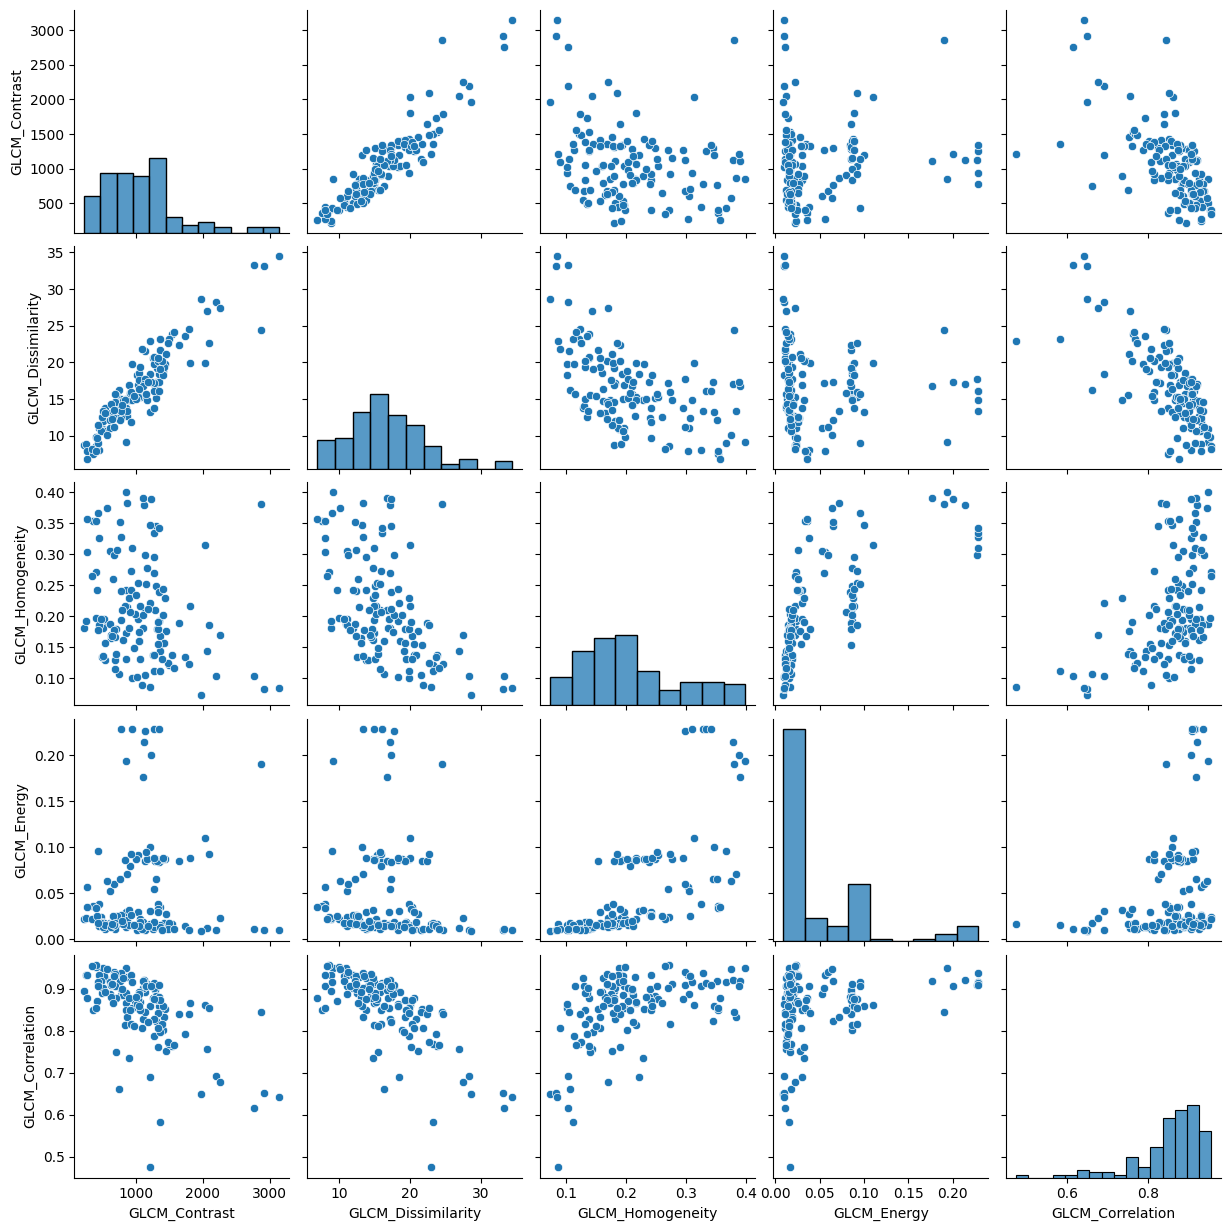

GLCM_Contrast         1065.476863
GLCM_Dissimilarity      16.520004
GLCM_Homogeneity         0.209612
GLCM_Energy              0.049326
GLCM_Correlation         0.854364
dtype: float64


In [39]:

import os
import cv2
from skimage.feature import graycomatrix, graycoprops
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 函数来计算GLCM特征
def get_glcm(image, distances=[5], angles=[0], levels=256, symmetric=True, normed=True):
    glcm = graycomatrix(image, distances=distances, angles=angles, levels=levels, symmetric=symmetric, normed=normed)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    return contrast, dissimilarity, homogeneity, energy, correlation

# 读取图像数据集
dataset_path = "C:\\Users\\Administrator\\Desktop\\hanfu2 p"
image_paths = [os.path.join(dataset_path, f) for f in os.listdir(dataset_path) if os.path.isfile(os.path.join(dataset_path, f))]

# 创建一个空的数据框来存储特征
data = []

for image_path in image_paths:
    image = cv2.imread(image_path, 0)  # 以灰度模式读取图片
    if image is None:
        print(f"Unable to open image: {image_path}")
        continue
    
    # 计算GLCM特征
    glcm_features = get_glcm(image)
    
    # 添加数据到数据框
    data.append([image_path] + list(glcm_features))

# 创建pandas数据框
columns = ['Image_Path', 'GLCM_Contrast', 'GLCM_Dissimilarity', 'GLCM_Homogeneity', 'GLCM_Energy', 'GLCM_Correlation']
df = pd.DataFrame(data, columns=columns)

# 计算每个特征的平均值
# 计算每个特征的平均值，排除"Image_Path"列
mean_features = df.iloc[:, 1:].mean()


# 可视化特征分布
sns.pairplot(df.iloc[:, 1:])
plt.show()

print(mean_features)





# CascadeClassifier

In [11]:
import cv2
import numpy as np

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

filtered_images = []
for image in unique_images:
    img_array = np.array(image)
    gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    if len(faces) <= 1:  # # If the number of detected faces is 0 or 1, add to filtered_images list
        filtered_images.append(image)

In [12]:
!pip install pytesseract

# Laplacian operator

In [ ]:
import cv2
import numpy as np

# will be used to store images that satisfy the condition
final_images = []

for image in unique_images:
    # Convert PIL images to OpenCV format
    image_cv = np.array(image)
    image_cv = image_cv[:, :, ::-1].copy() 
    
    # Check the image size
    if image.size[0] < 720 or image.size[1] < 720:
        continue

    # Evaluate image sharpness using the Laplacian operator
    laplacian_var = cv2.Laplacian(image_cv, cv2.CV_64F).var()
    threshold_value = 100  #  adjust this value as needed
    # Set the sharpness threshold, this value can be adjusted as needed
    if laplacian_var < threshold_value:
        continue
    
    #  If the condition is met, add to the final list
    final_images.append(image)

In [17]:
import os

desktop_path = os.path.expanduser("~")  # 获取用户主文件夹路径
desktop_path = os.path.join(desktop_path, "Desktop")  # 拼接桌面路径

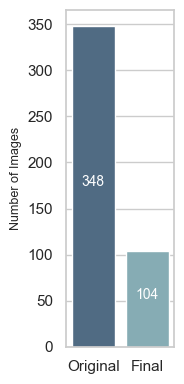

In [56]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 设定整体风格
sns.set(style="whitegrid")

# 创建用于条形图的数据
categories = ['Original', 'Final']
counts = [348, 104]

# 使用您提供的cubehelix_palette设置
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
selected_colors = [pal[5], pal[1]] # 选择第一个和最后一个颜色

plt.figure(figsize=(2, 4)) # 调整图表大小
barplot = sns.barplot(x=categories, y=counts, palette=selected_colors) # 使用选定的调色板

plt.ylabel('Number of Images', fontsize=9)


# 在每个条形上方添加数量标签
for i, count in enumerate(counts):
    plt.text(i, count/2, str(count), ha='center', color='white', fontsize=10) # 这里将标签颜色改为黑色，以便在浅色背景上更好地显示

plt.tight_layout()

# 获取桌面路径
desktop_path = os.path.expanduser("~")
desktop_path = os.path.join(desktop_path, "Desktop")

# 保存图像到桌面
image_path = os.path.join(desktop_path, "1.png")
plt.savefig(image_path, dpi=600, bbox_inches='tight')

plt.show()



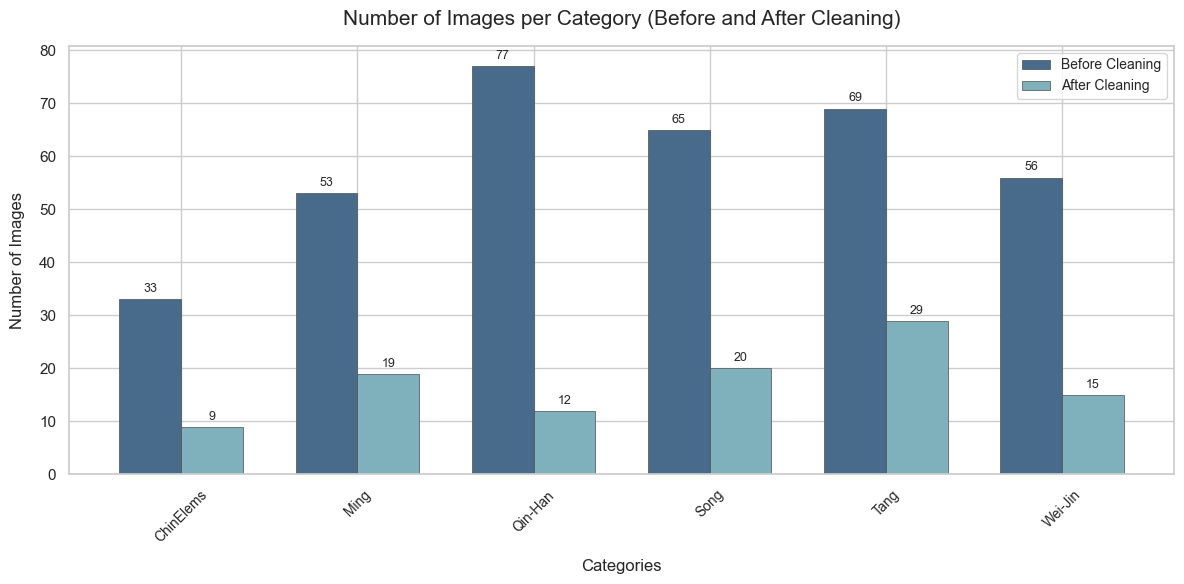

In [57]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# 设置主题
sns.set_theme(style="whitegrid")

# 使用您提供的cubehelix_palette设置
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
selected_colors = [pal[5], pal[1]] # 选择第五个和第一个颜色

def calculate_categories_count(image_directory):
    categories_count = {}
    for filename in os.listdir(image_directory):
        category = filename.split(' ')[0]
        if category in categories_count:
            categories_count[category] += 1
        else:
            categories_count[category] = 1
    return categories_count

image_directory_before = 'C:/Users/Administrator/Desktop/thesis/thesis dataset'
image_directory_after = 'C:/Users/Administrator/Desktop/thesis/thesis dataset - 2'

categories_count_before = calculate_categories_count(image_directory_before)
categories_count_after = calculate_categories_count(image_directory_after)

categories = list(categories_count_before.keys())
counts_before = [categories_count_before.get(category, 0) for category in categories]
counts_after = [categories_count_after.get(category, 0) for category in categories]

fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
index = range(len(categories))

bars_before = plt.bar(index, counts_before, bar_width, label='Before Cleaning', color=selected_colors[0], edgecolor=".3", linewidth=.5)
bars_after = plt.bar([i + bar_width for i in index], counts_after, bar_width, label='After Cleaning', color=selected_colors[1], edgecolor=".3", linewidth=.5)

plt.xlabel('Categories', fontsize=12, labelpad=10)
plt.ylabel('Number of Images', fontsize=12, labelpad=10)
plt.title('Number of Images per Category (Before and After Cleaning)', fontsize=15, pad=15)
plt.xticks([i + bar_width / 2 for i in index], categories, rotation=45, fontsize=10)
plt.legend(fontsize=10)

for bars in [bars_before, bars_after]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=9)


image_path = os.path.join(desktop_path, "5.png")
plt.savefig(image_path, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.savefig('comparison.png', dpi=600)
plt.show()


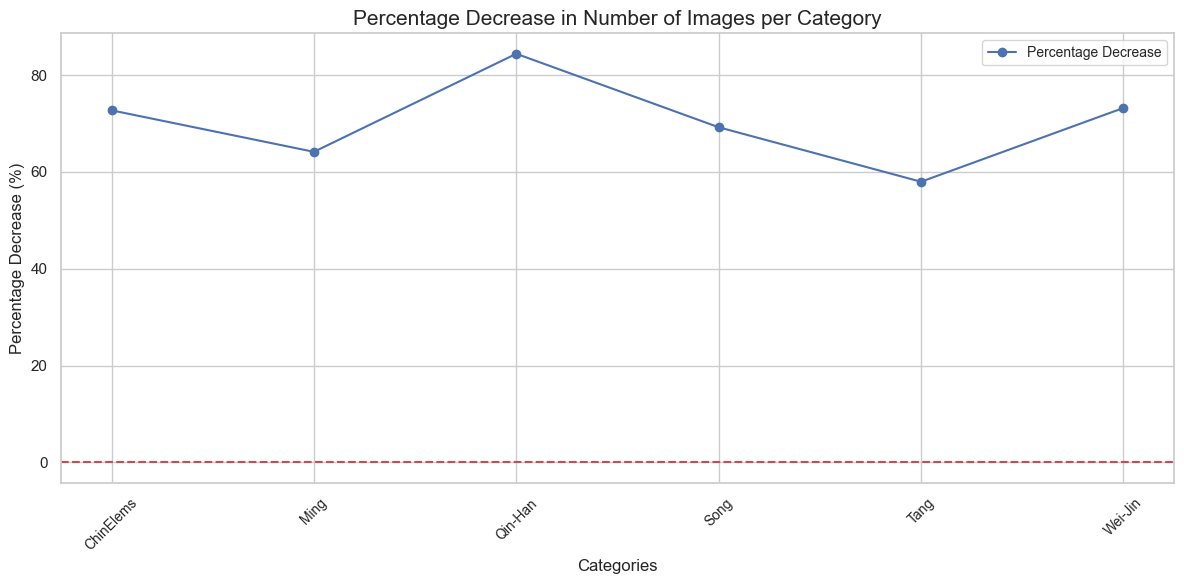

In [58]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def calculate_categories_count(image_directory):
    categories_count = {}
    for filename in os.listdir(image_directory):
        category = filename.split(' ')[0]
        if category in categories_count:
            categories_count[category] += 1
        else:
            categories_count[category] = 1
    return categories_count

image_directory_before = 'C:/Users/Administrator/Desktop/thesis/thesis dataset'
image_directory_after = 'C:/Users/Administrator/Desktop/thesis/thesis dataset - 2'

categories_count_before = calculate_categories_count(image_directory_before)
categories_count_after = calculate_categories_count(image_directory_after)

categories = list(categories_count_before.keys())
counts_before = np.array([categories_count_before.get(category, 0) for category in categories])
counts_after = np.array([categories_count_after.get(category, 0) for category in categories])

# 计算百分比减少
percentage_decrease = (counts_before - counts_after) / counts_before * 100

fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(categories, percentage_decrease, 'o-', color='b', label='Percentage Decrease')
plt.axhline(y=0, color='r', linestyle='--') # 添加一条红色的虚线表示零点
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Percentage Decrease (%)', fontsize=12)
plt.title('Percentage Decrease in Number of Images per Category', fontsize=15)
plt.xticks(rotation=45, fontsize=10)
plt.legend(fontsize=10)
image_path = os.path.join(desktop_path, "3.png")
plt.savefig(image_path, dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.savefig('percentage_decrease.png', dpi=600)
plt.show()


In [56]:


from PIL import Image
import os

# 获取桌面路径
desktop = os.path.join(os.path.join(os.environ['USERPROFILE']), 'Desktop')

# 创建一个文件夹来存储清理过的图像
output_folder = os.path.join(desktop, 'cleaned_images')
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 保存清理过的图像
for i, image in enumerate(final_images):
    image_path = os.path.join(output_folder, f'image_{i}.png')
    image.save(image_path)

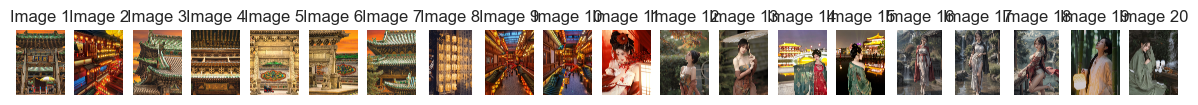

In [55]:
import matplotlib.pyplot as plt

# 选择要可视化的图像数量
num_images_to_show = 20

fig, axes = plt.subplots(1, num_images_to_show, figsize=(15, 3))

for i, ax in enumerate(axes):
    ax.imshow(final_images[i])
    ax.axis('off')  # 关闭坐标轴
    ax.set_title(f'Image {i+1}')

plt.show()

In [5]:
from PIL import Image
import os

def create_collage(images_path, collage_size, image_size=(512, 512)):
    collage_width, collage_height = collage_size
    collage = Image.new('RGB', (collage_width * image_size[0], collage_height * image_size[1]))
    image_files = [img for img in os.listdir(images_path) if img.endswith(".png")]
    print(f"Found {len(image_files)} PNG images in the directory.")

    image_list = [Image.open(os.path.join(images_path, img)) for img in image_files[:75]]
    
    x_offset, y_offset = 0, 0

    for img in image_list:
        collage.paste(img.resize(image_size), (x_offset, y_offset))
        x_offset += image_size[0]
        
        if x_offset >= collage_width * image_size[0]:
            x_offset = 0
            y_offset += image_size[1]
            
        if y_offset >= collage_height * image_size[1]:
            break

    # 获取桌面路径并保存拼贴图
    desktop_path = os.path.join(os.path.join(os.environ['USERPROFILE']), 'Desktop')
    collage_path = os.path.join(desktop_path, 'collage.png')
    collage.save(collage_path)
    print(f"Collage saved to {collage_path}")

images_path = 'C:/Users/Administrator/Desktop/thesis/HANFU/512hanfu'
collage_size = (8, 8)
create_collage(images_path, collage_size)


Found 75 PNG images in the directory.
Collage saved to C:\Users\Administrator\Desktop\collage.png


# Remove unwanted Tag

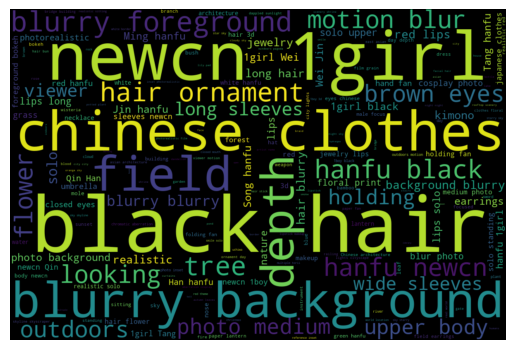

In [2]:
from wordcloud import WordCloud
import os

directory = "C:/Users/Administrator/Desktop/512 dataset+txt"
all_tags = ""

# 遍历目录，读取所有txt文件
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r') as file:
            tags = file.read()
            all_tags += " " + tags

# 生成词云
wordcloud = WordCloud(width=1200, height=800).generate(all_tags)

# 显示生成的词云
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

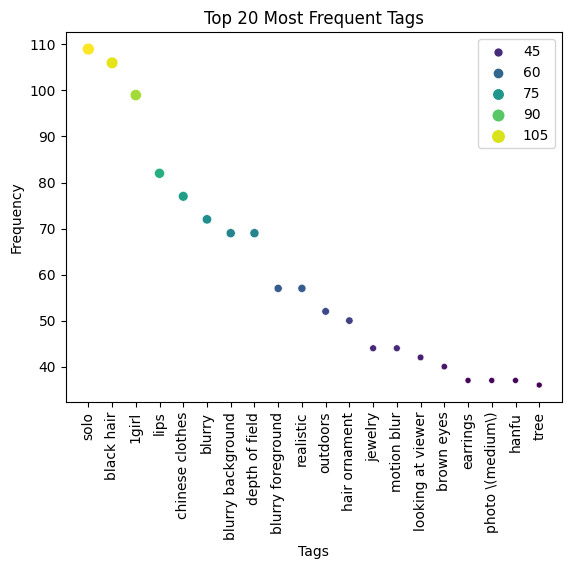

In [4]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

directory = "C:/Users/Administrator/Desktop/512 dataset+txt"
all_tags = ""

# 遍历目录，读取所有txt文件
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r') as file:
            tags = file.read()
            all_tags += " " + tags

# 计算标签频率
tag_counts = Counter(all_tags.split(", "))

# 获取最常见的20个标签
common_tags = tag_counts.most_common(20)
tags, counts = zip(*common_tags)

# 使用seaborn绘制散点图
sns.scatterplot(x=tags, y=counts, size=counts, hue=counts, palette="viridis")

plt.xticks(rotation=90)
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Tags')
plt.show()


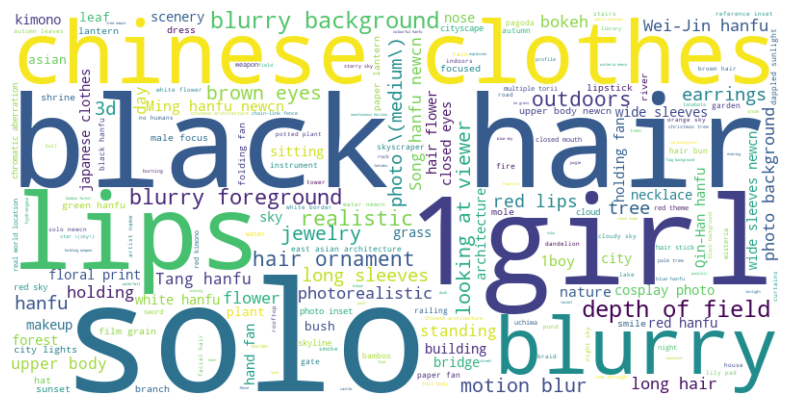

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import os

directory = "C:/Users/Administrator/Desktop/512 dataset+txt"
all_tags = ""

# 遍历目录，读取所有txt文件
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r') as file:
            tags = file.read()
            all_tags += " " + tags

# 计算标签频率
tag_counts = Counter(all_tags.split(", "))

# 生成词云


wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(tag_counts)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [1]:
import os
import shutil

def rename_and_move_files(src_directory, dest_directory):
    # 确保目标文件夹存在
    if not os.path.exists(dest_directory):
        os.mkdir(dest_directory)

    # 列出源文件夹中所有文件并排序
    files = sorted(os.listdir(src_directory))

    # 初始化一个计数器
    count = 1

    # 存储已经重命名的文件，避免重复
    processed_files = set()

    for file in files:
        if (file.endswith(".png") or file.endswith(".txt")) and file not in processed_files:
            # 获取文件的扩展名
            ext = os.path.splitext(file)[1]

            # 新的文件名
            new_name = f"hanfu({count}){ext}"

            # 移动并重命名文件到目标文件夹
            shutil.copy(os.path.join(src_directory, file), os.path.join(dest_directory, new_name))
            processed_files.add(file)

            # 如果对应的txt或png文件存在，则移动并重命名
            matching_file_ext = ".txt" if ext == ".png" else ".png"
            matching_file_name = file.rsplit('.', 1)[0] + matching_file_ext

            if matching_file_name in files:
                new_matching_name = f"hanfu({count}){matching_file_ext}"
                shutil.copy(os.path.join(src_directory, matching_file_name), os.path.join(dest_directory, new_matching_name))
                processed_files.add(matching_file_name)

                count += 1

if __name__ == "__main__":
    # 源文件夹路径
    source_directory = r'C:\Users\Administrator\Desktop\1'
    # 目标文件夹路径
    destination_directory = r'C:\Users\Administrator\Desktop\hanfu'

    rename_and_move_files(source_directory, destination_directory)


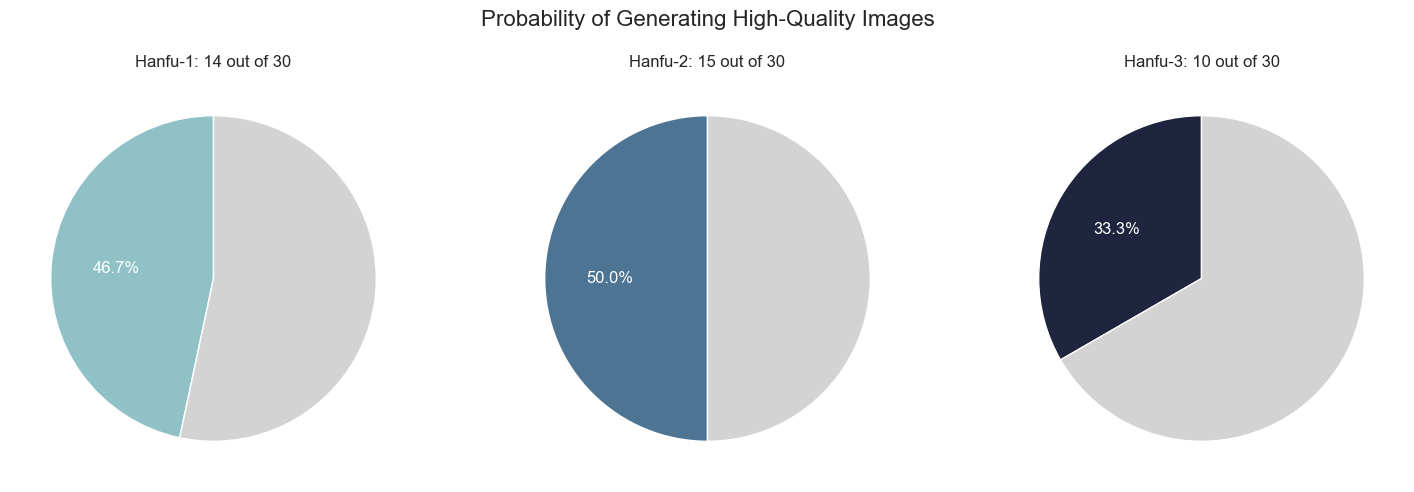

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 数据
models = ['Hanfu-1', 'Hanfu-2', 'Hanfu-3']
quality_images = [14, 15, 10]
total_images = 30  # 对于每个模型
quality_percentage = [x/total_images for x in quality_images]

# 定义颜色
pal = sns.cubehelix_palette(3, rot=-.25, light=.7)

# 画图
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, ax in enumerate(axs):
    # 为每个模型画一个饼状图
    labels = ['High-Quality Images', 'Other Images']
    sizes = [quality_percentage[i], 1-quality_percentage[i]]
    colors = [pal[i], 'lightgray']
    wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'color':"white"})
    
    # 仅显示“High-Quality Images”的百分比
    for t in texts:
        t.set_visible(False)
    autotexts[1].set_visible(False)

    ax.set_title(models[i] + f": {quality_images[i]} out of 30")

plt.suptitle("Probability of Generating High-Quality Images", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


